
Top 5 Matching Events for 'battle of panipat':


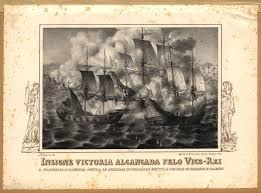

For further information you can refer to the wikipedia links  


------------------------------------------------------------------------------------------------------------------------------------------------------


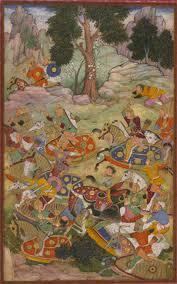

For further information you can refer to the wikipedia links  


------------------------------------------------------------------------------------------------------------------------------------------------------


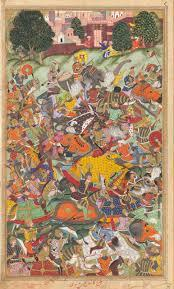

For further information you can refer to the wikipedia links  


------------------------------------------------------------------------------------------------------------------------------------------------------


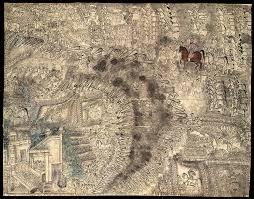

For further information you can refer to the wikipedia links  


------------------------------------------------------------------------------------------------------------------------------------------------------


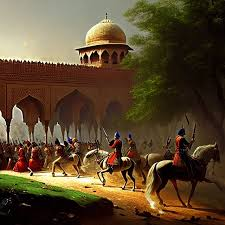

For further information you can refer to the wikipedia links  


------------------------------------------------------------------------------------------------------------------------------------------------------
No matching events found :(
Exiting the program. Thank you!


In [3]:
import os
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display ,HTML

data = pd.read_csv("AIRW_DATASET-data2.csv")

# Function to construct a Wikipedia URL from an event name
def construct_wikipedia_url(event_name):
    # Normalize the event name to fit URL format (spaces to underscores, etc.)
    normalized_name = event_name.replace(" ", "_").replace('&', 'and')
    return f"https://en.wikipedia.org/wiki/{normalized_name}"

# Function to retrieve event information based on event name or brief description
def retrieve_event_info(query):
    query_vector = vectorizer.transform([query])

    # Calculate cosine similarity for event names
    event_names_vector = vectorizer.transform(data["Event Name"])
    event_name_similarity = cosine_similarity(query_vector, event_names_vector)

    # Calculate cosine similarity for important info
    important_info_similarity = cosine_similarity(query_vector, tfidf_matrix)

    # Combine the similarities
    combined_similarity = event_name_similarity + important_info_similarity

    threshold = 0.1
    max_similarity = combined_similarity.max()
    if max_similarity < threshold:
        return []

    # Get indices of top matches
    most_similar_indices = combined_similarity.argsort()[0, :-6:-1]

    # Retrieve events in the order of dataset indices
    ordered_event_info_list = []
    for idx in range(len(data)):
        if idx in most_similar_indices:
            event_info = {
                "event_name": data.loc[idx, "Event Name"],
                
                "important_info": data.loc[idx, "Important Info"],
                "event_wikipedia_url": construct_wikipedia_url(data.loc[idx, "Event Name"])
            }
            ordered_event_info_list.append(event_info)

    return ordered_event_info_list

# retrieves the images from downloads folder 
def display_images(event_info_list):
    for event_info in event_info_list:
        event_name = event_info["event_name"]
        image_path = f"./download/{event_name}.jpeg"
        if os.path.exists(image_path):
            display(Image(filename=image_path))
        else:
            print(f"Image not found for {event_name}")

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the text into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(data["Important Info"])

# Get user input for the event name or brief description
while True:
    query = input("Enter an event name or brief description (or 'quit' to exit): ")
    if query.lower() == "quit":
        print("Exiting the program. Thank you!")
        break

    event_info_list = retrieve_event_info(query)

    if event_info_list:
        print(f"\nTop 5 Matching Events for '{query}':")
        for idx, event_info in enumerate(event_info_list[:5], start=1):
            
            # Using HTML to display information more readably
            display(HTML(f"<strong>Event Name:</strong> {event_info['event_name']}"))
            # Display image for the event
            event_name = event_info['event_name']
            image_path = f"./download/{event_name}.jpeg"
            if os.path.exists(image_path):
                display(Image(filename=image_path))
            else:
                print(f"Image not found for {event_name}")
            display(HTML(f"<strong>Important Info:</strong> <p>{event_info['important_info']}</p>"))
            print("For further information you can refer to the wikipedia links  ")
            display(HTML(f"<a href='{event_info['event_wikipedia_url']}'>{event_info['event_wikipedia_url']}</a>"))
            print("-" * 150)

    else:
        print("No matching events found :(")
